**Name**: Sujan Dumaru  
**Course**: MSCS 634-B01: Advanced Big Data and Data Mining  
**Lab Assignment**: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python in Jupyter Notebook

## Step 1: Data Collection  

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("Walmart_Sales.csv")

In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Step 2: Data Visualization 

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### 2.1 Scatter Plot: Temperature vs. Weekly Sales  
**Goal:** See how daily temperature correlates with sales.

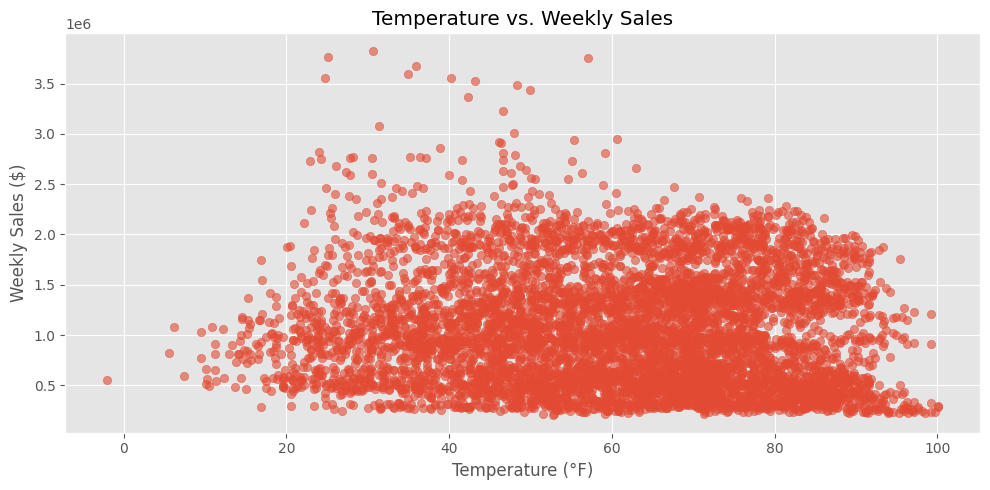

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Temperature'], df['Weekly_Sales'], alpha=0.6)
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales ($)')
plt.tight_layout()
plt.show()

**Insight:** The scatter plot shows almost no clear link between temperature and sales, with peak variability around moderate temperatures.

### 2.2 Line Plot: Weekly Sales Over Time  
**Goal:** Visualize sales trends and seasonality.

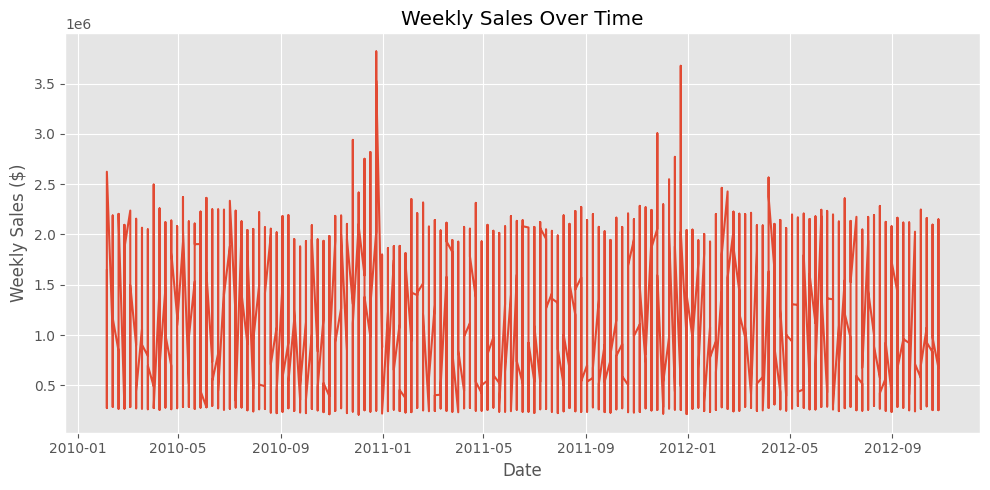

In [12]:
# Convert Date to datetime and sort
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df_sorted = df.sort_values('Date')

plt.figure(figsize=(10, 5))
plt.plot(df_sorted['Date'], df_sorted['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.tight_layout()
plt.show()

**Insight:** The line plot reveals stable weekly sales punctuated by sharp year-end holiday spikes.

## Step 3: Data Preprocessing 

### 3.1 Handling Missing Values  
**Goal:** Detect and report missing data then apply a filling strategy

In [13]:
# Check for missing values
missing_before = df.isnull().sum()
print("Missing values before handling\n", missing_before)

Missing values before handling
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [15]:
# Fill missing values with the median
df_filled = df.fillna(df.median())

missing_after = df_filled.isnull().sum()
print("Missing values after handling\n", missing_after)

Missing values after handling
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


**Insight:** No missing values were found, hence, filling is not necessary.

### 3.2 Outlier Detection and Removal  
**Goal:** Identify outliers in Weekly_Sales using the IQR method and remove them

In [18]:
# Compute IQR
Q1 = df_filled['Weekly_Sales'].quantile(0.25)
Q3 = df_filled['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR range {lower_bound:.2f} to {upper_bound:.2f}")

# Remove outliers
df_clean = df_filled[(df_filled['Weekly_Sales'] >= lower_bound) & (df_filled['Weekly_Sales'] <= upper_bound)]

print("Rows before outlier removal", df_filled.shape[0])
print("Rows after outlier removal", df_no_outliers.shape[0])


IQR range -746862.73 to 2720371.49
Rows before outlier removal 6435
Rows after outlier removal 6401


## 3.3 Data Reduction  
**Goal:** Reduce dataset size by sampling and eliminate less relevant columns

In [21]:
# Drop the Unemployment column
df_reduced = df_clean.drop(columns=['Unemployment'])

# Random sampling 50 percent of the data
df_sampled = df_reduced.sample(frac=0.5, random_state=42)

print("Shape before reduction", df_clean.shape)
print("Shape after reduction", df_sampled.shape)

Shape before reduction (6401, 8)
Shape after reduction (3200, 7)


## 3.4 Data Scaling and Discretization  
**Goal** Normalize numeric fields and convert a continuous variable into categories

In [22]:
# Min-Max scaling of Temperature
temp_min = df_sampled['Temperature'].min()
temp_max = df_sampled['Temperature'].max()
df_sampled['Temp_Scaled'] = (df_sampled['Temperature'] - temp_min) / (temp_max - temp_min)

# Discretize Temperature into three bins
df_sampled['Temp_Category'] = pd.cut(df_sampled['Temperature'], bins=[-float('inf'), 50, 75, float('inf')], labels=['Cool','Mild','Hot']
)

# Show before/after examples
df_sampled[['Temperature','Temp_Scaled','Temp_Category']].head()

,Temperature,Temp_Scaled,Temp_Category
1388,51.00,0.479182,Mild
4484,34.86,0.306433,Cool
5030,81.88,0.809697,Hot
1043,51.07,0.479931,Mild
132,84.85,0.841486,Hot


## Step 4: Statistical Analysis 

## 4.1 General Overview of Data  
**Goal:** Examine overall structure, types, and summary statistics.

In [32]:
df_sampled = df_sampled.drop(columns=['Temp_Scaled'])
df_sampled = df_sampled.drop(columns=['Temp_Category'])

# Data info
df_sampled.info()

# Descriptive statistics
df_sampled.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3200 entries, 1388 to 2857
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         3200 non-null   int64         
 1   Date          3200 non-null   datetime64[ns]
 2   Weekly_Sales  3200 non-null   float64       
 3   Holiday_Flag  3200 non-null   int64         
 4   Temperature   3200 non-null   float64       
 5   Fuel_Price    3200 non-null   float64       
 6   CPI           3200 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 200.0 KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI
count,3200.000000,3200,3.200000e+03,3200.000000,3200.000000,3200.000000,3200.000000
mean,22.890625,2011-06-19 15:59:51,1.044816e+06,0.068125,60.884184,3.358178,172.568754
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,6.230000,2.513000,126.064000
25%,11.000000,2010-10-15 00:00:00,5.553879e+05,0.000000,47.547500,2.924000,132.022667
50%,23.000000,2011-06-17 00:00:00,9.724779e+05,0.000000,63.245000,3.433000,184.809719
75%,34.000000,2012-02-24 00:00:00,1.428969e+06,0.000000,74.977500,3.735000,213.555540
max,45.000000,2012-10-26 00:00:00,2.678206e+06,1.000000,99.660000,4.468000,226.987364
std,13.032118,NaN,5.456529e+05,0.252000,18.345400,0.462784,39.551099


## 4.2 Central Tendency Measures  
**Goal:** Compute minimum, maximum, mean, median, and mode for each numeric variable.

In [33]:
numeric_cols = df_sampled.select_dtypes(include='number').columns

ct_summary = pd.DataFrame({
    'min': df_sampled[numeric_cols].min(),
    'max': df_sampled[numeric_cols].max(),
    'mean': df_sampled[numeric_cols].mean(),
    'median': df_sampled[numeric_cols].median(),
    'mode': df_sampled[numeric_cols].mode().iloc[0]
})

ct_summary

,min,max,mean,median,mode
Store,1.000,4.500000e+01,2.289062e+01,23.000000,1.000000
Weekly_Sales,209986.250,2.678206e+06,1.044816e+06,972477.950000,209986.250000
Holiday_Flag,0.000,1.000000e+00,6.812500e-02,0.000000,0.000000
Temperature,6.230,9.966000e+01,6.088418e+01,63.245000,50.560000
Fuel_Price,2.513,4.468000e+00,3.358178e+00,3.433000,3.638000
CPI,126.064,2.269874e+02,1.725688e+02,184.809719,129.283258


## 4.3 Dispersion Measures  
**Goal:** Compute range, quartiles, IQR, variance, and standard deviation.

In [34]:
disp = pd.DataFrame({
    'range': df_sampled[numeric_cols].max() - df_sampled[numeric_cols].min(),
    'Q1': df_sampled[numeric_cols].quantile(0.25),
    'Q3': df_sampled[numeric_cols].quantile(0.75),
})
disp['IQR'] = disp['Q3'] - disp['Q1']
disp['variance'] = df_sampled[numeric_cols].var()
disp['std_dev'] = df_sampled[numeric_cols].std()
disp

,range,Q1,Q3,IQR,variance,std_dev
Store,4.400000e+01,11.000000,3.400000e+01,23.000000,1.698361e+02,13.032118
Weekly_Sales,2.468220e+06,555387.935000,1.428969e+06,873580.937500,2.977371e+11,545652.881710
Holiday_Flag,1.000000e+00,0.000000,0.000000e+00,0.000000,6.350383e-02,0.252000
Temperature,9.343000e+01,47.547500,7.497750e+01,27.430000,3.365537e+02,18.345400
Fuel_Price,1.955000e+00,2.924000,3.735000e+00,0.811000,2.141694e-01,0.462784
CPI,1.009234e+02,132.022667,2.135555e+02,81.532874,1.564289e+03,39.551099


## 4.4 Correlation Analysis  
**Goal:** Compute and inspect correlations among numeric features.

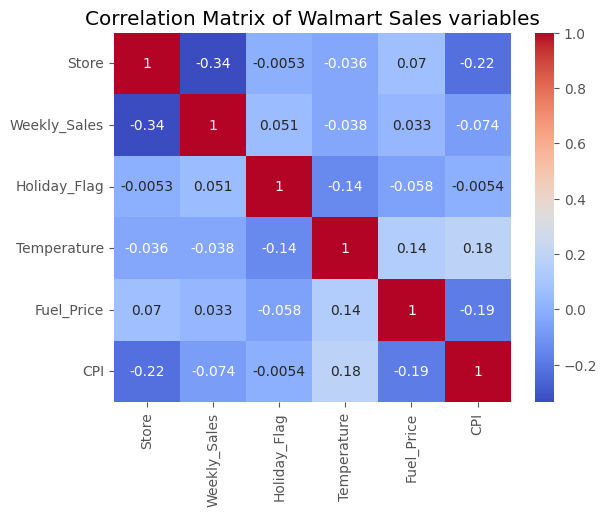

In [37]:
import seaborn as sns

corr_matrix = df_sampled[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Walmart Sales variables")
plt.show()